<h1><center> Medical Image Diagnosis</h1></center>
<h3>What Is Optical Coherence Tomography?</h3>
<p>Optical coherence tomography (OCT) is a non-invasive imaging test. OCT uses light waves to take cross-section pictures of your retina.

With OCT, your ophthalmologist can see each of the retina’s distinctive layers. This allows your ophthalmologist to map and measure their thickness. These measurements help with diagnosis. They also provide treatment guidance for glaucoma and diseases of the retina. These retinal diseases include age-related macular degeneration (AMD) and diabetic eye disease.</p>

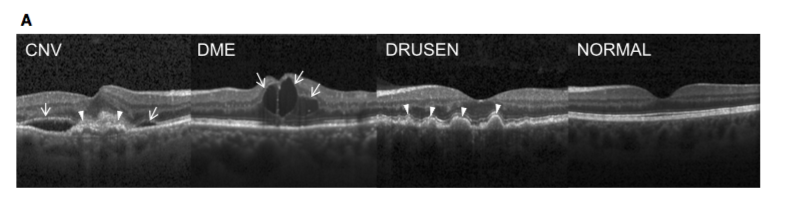

<h2>About Our data</h2>

<p>The dataset is organized into 3 folders (train, test, val) and contains subfolders for each image category (NORMAL,CNV,DME,DRUSEN).</p>
<p> There are <i><b>84,495 X-Ray images</b></i> (JPEG) and 4 categories (NORMAL,CNV,DME,DRUSEN).</p>

In [3]:
import numpy as np 
import pandas as pd 

import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.layers import Dropout


from sklearn.model_selection import train_test_split, cross_val_score
from collections import Counter
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import TfidfVectorizer


from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Conv1D, GRU, CuDNNGRU, CuDNNLSTM, BatchNormalization
from keras.layers import Bidirectional, GlobalMaxPool1D, MaxPooling1D, Add, Flatten, Masking
from keras.layers import GlobalAveragePooling1D, GlobalMaxPooling1D, concatenate, SpatialDropout1D
from keras.models import Model, load_model
from keras import initializers, regularizers, constraints, optimizers, layers, callbacks
from keras import backend as K
from keras.engine import InputSpec, Layer
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint,  Callback, EarlyStopping, ReduceLROnPlateau

In [5]:
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.optim as optim
import torch.utils.data
from torch.autograd import Variable

In [6]:
def create_model(in_shape,pool_size,kernal_size):
    inputs=Input(shape=in_shape)
    x=Convolution2D(filters=32,kernel_size=kernal_size,activation='relu')(inputs)
    x=MaxPooling2D(pool_size=pool_size)(x)
    x=Dropout(0.3)(x)
    x=Convolution2D(filters=64,kernel_size=kernal_size,activation='relu')(x)
    x=MaxPooling2D(pool_size=pool_size)(x)
    x=Dropout(0.3)(x)
    x=Convolution2D(filters=128,kernel_size=kernal_size,activation='relu')(x)
    x=MaxPooling2D(pool_size=pool_size)(x)
    x=Dropout(0.3)(x)
    x=Convolution2D(filters=128,kernel_size=kernal_size,activation='relu')(x)
    x=MaxPooling2D(pool_size=pool_size)(x)
    x=Dropout(0.3)(x)
    x=Flatten()(x)
    x=Dense(4,activation='softmax')(x)
    return x,inputs

In [11]:
import warnings
warnings.filterwarnings("ignore")

In [12]:
out,ins=create_model(in_shape=(256,256,3),pool_size=(2,2),kernal_size=(3,3))

In [13]:
model=Model(input=ins,output=out)

In [14]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [15]:
from keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto', baseline=None,
                         restore_best_weights=False)

In [16]:
from keras.preprocessing.image import ImageDataGenerator
def model_trainer(model):
    train_datagen = ImageDataGenerator(rescale = 1./150, 
                                   shear_range = 0.01, 
                                   zoom_range =[0.9, 1.25],
                                   rotation_range=20,
                                   zca_whitening=True,
                                   vertical_flip=True,
                                   fill_mode='nearest',
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   brightness_range=[0.5, 1.5],
                                   horizontal_flip = True)
    test_datagen = ImageDataGenerator(rescale = 1./160)

In [ ]:
TRAIN_PATH = '../retina/OCT2017/train'
TEST_PATH = '../retina/OCT2017/test'
VAL_PATH = '../retina/OCT2017/val'